In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 

In [53]:

# df.head()

In [54]:
# df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
# df = df.set_index("DATE")

In [55]:
# df.head()

In [123]:
VEGETABLE = 'tomato'
df = pd.read_csv(VEGETABLE+'.csv')
df.columns

Index(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX', 'MODAL', 'DATE'],
      dtype='object')

In [124]:

df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df = df.set_index("DATE")
df['MODAL'] = df['MODAL'].apply(lambda x: int(x))

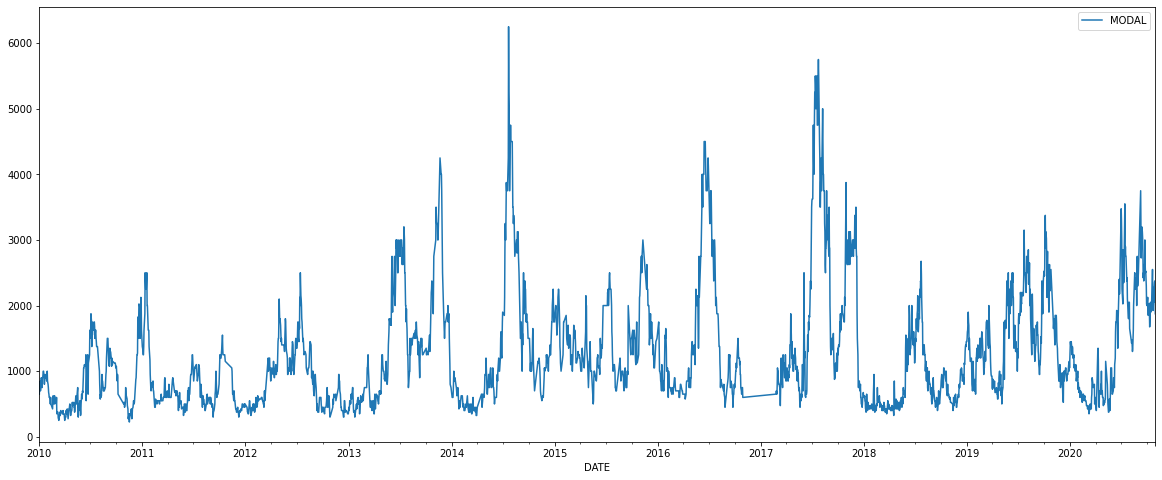

In [125]:
df = df.dropna()
df = df.resample('1D').interpolate(method= "linear")
fig, axes = plt.subplots(figsize=(20,8))
df.plot(ax= axes)
plt.show()

In [126]:
df.to_csv(VEGETABLE+"_processed.csv")

In [127]:
THRESHOLD_DEVIATION = 3
from math import sqrt 
df_mod = df.copy()
count = 0
for i in range(1, len(df)):
    start = max(i-7,0)
    end = i-1
    N = (end-start+1)
    if N==0:
        print("N is 0")
    mean = sum(df['MODAL'][start:end+1])/N
    std = sqrt(sum(((df['MODAL']-mean)**2)[start:end+1])/N)
    z_score = (df_mod['MODAL'][i] - mean)/std
    if abs(z_score) > THRESHOLD_DEVIATION:
#         df_mod['MODAL'][i] = np.nan
        df_mod['MODAL'][i] = mean
        count += 1
print(count)


/home/siram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

divide by zero encountered in double_scalars

/home/siram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in double_scalars



386


In [128]:
df_mod.head()

,MODAL
DATE,
2010-01-01,650.0
2010-01-02,650.0
2010-01-03,825.0
2010-01-04,850.0
2010-01-05,700.0


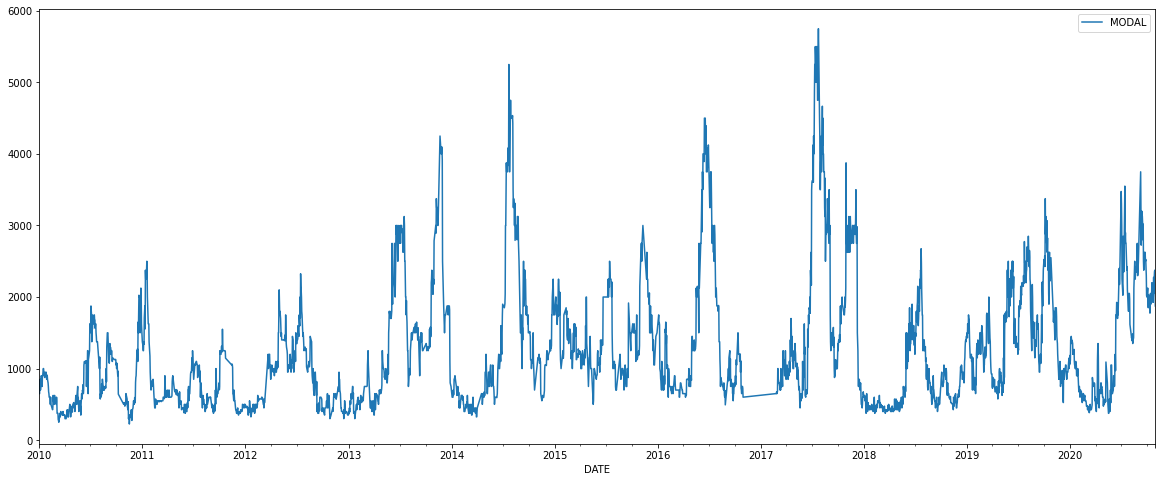

In [129]:
fig, axes = plt.subplots(figsize=(20,8))
df_mod.plot(ax= axes)
plt.show()

In [130]:
df_mod = df_mod.dropna()
df_mod = df_mod.resample('1D').interpolate(mehod= "linear")

In [131]:
# import plotly.plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

data = go.Scatter(x=df_mod.index,
                         y=df_mod['MODAL'].values)
layout = go.Layout(title='Vegetable Pice Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='Price per Quintal'))
fig = go.Figure(data=[data], layout=layout)
# py.iplot(fig, sharing='public')
fig.show()

In [132]:
(df_mod.reset_index()).to_csv(VEGETABLE+"_NO_OUTLIERS.csv")